# Лабораторная работа 4. Функции.

Функция в программировании представляет собой обособленный участок кода, который можно вызывать, обратившись к нему по имени, которым он был назван. При вызове происходит выполнение команд тела функции.

Функции можно сравнить с небольшими программками, которые сами по себе, т.е. автономно, не исполняются, а встраиваются в обычную программу. Нередко их так и называют – подпрограммы. Других ключевых отличий функций от программ нет. Функции также при необходимости могут получать и возвращать данные. Только обычно они их получают не с ввода (клавиатуры, файла и др.), а из вызывающей программы. Туда же они возвращают результат своей работы.

# Необязательные параметры и сопоставление по ключам

Чтобы сделать некоторые параметры функции необязательными, следует в определении функции присвоить этому параметру начальное значение. Сопоставление по ключам очень удобно использовать, если функция имеет несколько необязательных
параметров. В этом случае не нужно указывать все значения, а достаточно присвоить значение нужному параметру.

In [1]:
def summa(а=2, b=3, с=4): # Все параметры являются необязательными
    return а + b + с

In [2]:
print(summa())          # Использование значений по умолчанию
print(summa(2, 3, 20))  # Позиционное присваивание
print(summa(с=20))      # Сопоставление по ключам

9
25
25


# Переменное число параметров в функции

Если перед параметром в определении функции указать символ `*`, то функции можно будет передать произвольное количество параметров. Все переданные параметры сохраняются в кортеже. Для примера напишем функцию суммирования произвольного количества чисел:

In [3]:
def summa(*t):
    res = 0
    for i in t:  # Перебираем кортеж с переданными параметрами
        res += i
    return res

In [4]:
print(summa(10, 20)) 
print(summa(10, 20, 30, 40, 50, 60)) 

30
210


# Глобальные и локальные переменные

Глобальные переменные — это переменные, объявленные в программе вне функции. В Python глобальные переменные видны в любой части модуля, включая функции.

Локальные переменные — это переменные, объявляемые внутри функций. Если имя локальной переменной совпадает с именем глобальной переменной, то все операции внутри функции осуществляются с локальной переменной, а значение глобальной переменной не изменяется. Локальные переменные видны только внутри тела функции.

In [5]:
def func():
    l_v = 77  # Локальная переменная
    g_v = 25  # Локальная переменная
    print("Значение l_v внутри функции =", l_v)
    print("Значение g_v внутри функции =", g_v)
    g_v = 10  # Глобальная переменная

In [7]:
g_v = 10
func()  # Вызываем функцию
print("Значение g_v вне функции =", g_v)
try:
    print("Значение l_v вне функции =", l_v)  # Вызовет исключение NameError
except NameError:  # Обрабатываем исключение
    print("Переменная l_v не видна вне функции.")

Значение l_v внутри функции = 77
Значение g_v внутри функции = 25
Значение g_v вне функции = 10
Переменная l_v не видна вне функции.


# Рекурсия

Рекурсия — это возможность функции вызывать саму себя. Рекурсию удобно использовать для перебора объекта, имеющего заранее неизвестную структуру, или для выполнения неопределенного количества операций. 

Рекурсивные функции являются мощным механизмом в программировании. К сожалению, они не всегда эффективны. А ещё использование рекурсии часто приводит к ошибкам. Наиболее распространенная из таких ошибок — бесконечная рекурсия: это когда цепочка вызовов функций никогда не завершается и продолжается, пока не кончится свободная память в компьютере.

В качестве примера рассмотрим вычисление факториала.

# Пример 1. Факториал.


Факториалом числа называют произведение всех натуральных чисел до него включительно:

$$ n! = 1 \cdot 2 \cdot ... \cdot n. $$

In [8]:
def factorial_recursive(n):
    if n == 0 or n == 1:
        return 1  # тривиальный случай должен быть описан в начале функции
    else:
        return n * factorial_recursive(n - 1)

Эта программа эквивалентна следующей:

In [9]:
def factorial(n):
    factorial = 1
    while n > 1:
        factorial *= n
        n -= 1
    return factorial

In [10]:
factorial_recursive(4)

24

In [11]:
for i in range(1, 7):
    print(factorial_recursive(i), end=' ')

1 2 6 24 120 720 

Протестируем корректность работы программ:

In [12]:
assert factorial_recursive(0) == 1
assert factorial_recursive(1) == 1
assert factorial_recursive(4) == 24

assert factorial(0) == 1
assert factorial(1) == 1
assert factorial(4) == 24

Утверждение (ключевое слово) `assert` существует во многих языках программирования. Это помогает обнаруживать проблемы в начале программы, где причина ясна, а не позже, как побочный эффект какой-либо другой операции. Используя это слово, вы говорите программе проверить это условие и немедленно вызвать ошибку, если условие ложно.

In [13]:
import numpy as np

n = 25
A = np.zeros(n)

In [14]:
%timeit for i in range(n): A[i] = factorial_recursive(i)
%timeit for i in range(n): A[i] = factorial(i)

175 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
111 µs ± 5.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Функции-генераторы

Функцией-генератором называется функция, которая при последовательных вызовах возвращает очередной элемент какой-либо последовательности. Приостановить выполнение функции и превратить функцию в генератор позволяет ключевое слово `yield`. Генератор перестает возвращать значения, когда итераций больше нет, при достижении пустой команды `return` или конца функции. Локальные переменные в функции-генераторе сохраняются между вызовами (в отличие от обычных функций).

Одну такую функцию мы уже встречали, это функция `range()`. Рассмотрим пример с этой функцией.

# Пример 2.

In [15]:
for x in range(5):
    print(x)

0
1
2
3
4


На её основе легко написать функцию, которая возводит элементы последовательности в заданную степень:

In [16]:
def fun_x_in_y(x, у):
    for i in range(1, x + 1):
        yield i ** у

In [17]:
for n in fun_x_in_y(10, 2):
    print(n, end=' ')
print()

for n in fun_x_in_y(10, 3):
    print(n, end=' ') 

1 4 9 16 25 36 49 64 81 100 
1 8 27 64 125 216 343 512 729 1000 

Однако функцию-генератор легко можно написать и без `range()`:

In [18]:
def four():
    x = 0 
    while x < 4:
        print("В генераторе x =", x)
        yield x 
        x += 1

In [19]:
for x in four():
    print('А вне генератора x =', x)

В генераторе x = 0
А вне генератора x = 0
В генераторе x = 1
А вне генератора x = 1
В генераторе x = 2
А вне генератора x = 2
В генераторе x = 3
А вне генератора x = 3


# Упражнение 1. Факториал-генератор

Напишите функцию-генератор, возвращающую значение факториала.

In [20]:
def factorial_generator(x):
    mul = 1
    i = 1
    while i <= x:
        mul *= i
        yield mul
        i += 1

In [21]:
for k in factorial_generator(6):
    print(k, end=' ')

1 2 6 24 120 720 

# Перехват ошибки.



Как мы уже знаем, программа, содержащая синтактические ошибки, не может работать. На самом деле это не совсем верно: любая ошибка приводит к появлению во время работы программы (интерпретатора) "исключения", которое не позволяет продолжить выполнение программы. Если это исключение можно преодолеть (обработать), программа сможет продолжить работать.

При ошибке в тексте программы в терминологии языка Python возникает исключение, принадлежащее классу `SyntaxError`. Согласно документации Python синтаксические ошибки все-таки принято относить к ошибкам, а все остальные — к исключениям. В некоторых языках программирования не используется слово "исключение", а ошибки делят на синтаксические и семантические. Нарушение семантики обычно означает, что, хотя выражения написаны верно с точки зрения синтаксиса языка, программа не работает так, как от нее ожидалось. 

Ошибку любого рода можно перехватить (обработать) следующим образом:

```
try:
    <блок инструкций 1>
except:
    <блок инструкций 2 - выполняется в случае ошибки в блоке инструкций 1>
finally:
    <блок инструкций 3 - выполняется вне зависимости от наличия/отсутствия ошибок>
```

Однако такой универсальный перехват не всегда дает возможность правильно обработать ошибку. Возможно, для эффективного её исправления необходимо глубже понять её природу. Для этого есть ряд ключевых вариантов:

1. `ArithmeticError` - арифметическая ошибка.
    - `FloatingPointError` — порождается при неудачном выполнении операции с плавающей запятой. На практике встречается нечасто.
    - `OverflowError` — возникает, когда результат арифметической операции слишком велик для представления. Не появляется при обычной работе с целыми числами (так как python поддерживает длинные числа), но может возникать в некоторых других случаях.
    - `ZeroDivisionError` — деление на ноль.
2. `IndexError` — индекс не входит в диапазон элементов.
3. `MemoryError` — недостаточно памяти.
4. `SyntaxError` — синтаксическая ошибка.
5. `TypeError` — операция применена к объекту несоответствующего типа.
6. `ValueError` — функция получает аргумент правильного типа, но некорректного значения.

У оператора обработки исключений, кроме `except`, могут быть еще ветки `finally` и `else` (не обязательно обе сразу). Тело `finally` выполняется всегда, независимо от того, выполнялись ли блоки `except` в ответ на возникшие исключения или нет. Тело `else` сработает, если исключений в `try` не было, т. е. не было переходов на блоки `except`.

# Пример 3.

In [22]:
def divide():
    try:
        a = float(input("Введите делимое: "))
        b = float(input("Введите делитель: "))
        c = a / b
        print("Частное: {:.2f}".format(c))
    except ValueError:
        print("Нельзя вводить строки!")
    except ZeroDivisionError:
        print("Нельзя делить на ноль!")
    finally:  # выполняется в любом случае
        print("Конец программы.")

In [23]:
divide()

Введите делимое: 124
Введите делитель: 0
Нельзя делить на ноль!
Конец программы.


In [24]:
divide()

Введите делимое: 2
Введите делитель: a
Нельзя вводить строки!
Конец программы.


# Пример 4. 

Функция для проверки чисел на чётность или нечётность. 

Разберите структуру:

In [27]:
def parity():
    sf = 1
    while bool(sf):
        s = input('Введите число: ')
        try:
            # перехватывает любую ошибку
            if not s:
                return
            if not bool(int(s) % 2):
                print('Чётное.')
            else:
                print('Нечётное.')
        except:
            print('Йода говорит: только целые числа нужны нам!')

Вызов функции:

In [28]:
parity()

Введите число: фа
Йода говорит: только целые числа нужны нам!
Введите число: 0.0
Йода говорит: только целые числа нужны нам!
Введите число: 0
Чётное.
Введите число: 


# Упражнение 2. Точный перехват.

Уточните тип возможной ошибки и доработайте соответствующее уведомление пользователю.

In [29]:
def is_even():
    i = input('Введите целое число: ')
    try:
        print(int(i) % 2)
    except ValueError:
        print(f'Вы ввели не целое число. Тип переменной: {type(i)}')

In [30]:
is_even()

Введите целое число: k
Вы ввели не целое число. Тип переменной: <class 'str'>


Пример функции: функция для перевода числа из одной системы счисления в другую в виде цикла.

Разберите структуру:

In [31]:
def err_msg():
    print('Будьте внимательны при вводе значений для вызова функции. Проверьте, выполняются ли следующие пункты:')
    print('1. Базы исходного и нового числа равны числу от 1 до 36.')
    print('2. Само число не содержит других знаков, кроме как следующих:')
    print('\t"0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"')
    print('3. Если все удовлетворяет двум условиям выше, то ошибка таится в работе самого алгоритма.')
    print('К сожалению, писал его не я. Но вы можете воспользоваться этим сайтом для проверки: '
          'matworld.ru/calculator/perevod-chisel.php')

In [32]:
def convert_base(num, to_base=10, from_base=10):
    alphabet = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    # приведение к десятичной базе (ЗАГЛУШКА)
    x = int(num, from_base)
    # приведение к новой базе
    it = 0
    digit = []
    while x > 0:
        digit.insert(0, alphabet[x % to_base])
        x = x // to_base
        it += 1
    for i in range(it):
        print(digit[i], end='')
    print()

In [33]:
convert_base('111', to_base=8, from_base=12)

235


In [34]:
try:
    convert_base(input('Введите число: '), 
                 to_base = int(input('Введите нужную базу числа: ')), 
                 from_base = int(input('Введите базу исходного числа: ')))
except ValueError:
    print('Ошибка введенных данных!')
except ZeroDivisionError:
    print('Ошибка деления на ноль!')
except IndexError:
    print('Ошибка индекса!')
finally:
    err_msg()

Введите число: 123
Введите нужную базу числа: 35
Введите базу исходного числа: 8
2D
Будьте внимательны при вводе значений для вызова функции. Проверьте, выполняются ли следующие пункты:
1. Базы исходного и нового числа равны числу от 1 до 36.
2. Само число не содержит других знаков, кроме как следующих:
	"0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
3. Если все удовлетворяет двум условиям выше, то ошибка таится в работе самого алгоритма.
К сожалению, писал его не я. Но вы можете воспользоваться этим сайтом для проверки: matworld.ru/calculator/perevod-chisel.php


Пример функции: функция для перевода числа из одной системы счисления в другую в рекурсивной форме.

Разберите структуру:

In [26]:
def convert_base_R(num, to_base=10, from_base=10):
    alphabet = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    if isinstance(num, str):     # праверка типа, аналогично type(num) == str
        n = int(num, from_base)  # приведение к десятичной базе (ЗАГЛУШКА)
    else:
        n = int(num)
    # приведение к новой базе
    if n < to_base:
        return alphabet[n]
    else:
        return convert_base_R(n // to_base, to_base) + alphabet[n % to_base]

In [28]:
convert_base_R('1236', to_base = 8, from_base = 12)

'4012'

In [52]:
try:
    print(convert_base_R(input('Введите число: '), 
                         to_base = int(input('Введите нужную базу числа: ')), 
                         from_base = int(input('Введите базу исходного числа: '))))
except ValueError:
    print('Ошибка введенных данных.')
    ERRMSG()
except ZeroDivisionError:
    print('Ошибка деления на ноль.')
    ERRMSG()
except IndexError:
    print('Ошибка индекса.')
    ERRMSG()

Введите число: 1236
Введите нужную базу числа: 8
Введите базу исходного числа: 12
4012


# Домашнее задание (базовое):

# Задание 1

В программировании можно из одной функции вызывать другую. Для иллюстрации этой возможности напишите программу по следующему описанию.

Основная ветка программы, не считая заголовков функций, состоит из одной строки кода. Это вызов функции `test()`. В ней запрашивается на ввод целое число. Если оно положительное, то вызывается функция `positive()`, тело которой содержит команду вывода на экран слова "`Положительное`". Если число отрицательное, то вызывается функция `negative()`, ее тело содержит выражение вывода на экран слова "`Отрицательное`".

In [38]:
def positive():
    print('Положительное')

def negative():
    print('Отрицательное')

In [39]:
def test():
    x = int(input('Введите целое число: '))
    if x >= 0:
        positive()
    else:
        negative()

In [40]:
test()

Введите целое число: 21376
Положительное


# Задание 2

Напишите программу, в которой определены следующие четыре функции:

1. Функция `getInput()` не имеет параметров, запрашивает ввод с клавиатуры и возвращает в основную программу полученную строку.

2. Функция `testInput(<объект>)` имеет один параметр. В теле она проверяет, можно ли переданное ей значение преобразовать к целому числу. Если можно, возвращает логическое `True`. Если нельзя – `False`.

3. Функция `strToInt(<объект>)` имеет один параметр. В теле преобразовывает переданное значение к целочисленному типу. Возвращает полученное число.

4. Функция `printInt(<значение>)` имеет один параметр. Она выводит переданное значение на экран и ничего не возвращает.

В основной ветке программы вызовите первую функцию. То, что она вернула, передайте во вторую функцию. Если вторая функция вернула `True`, то те же данные (из первой функции) передайте в третью функцию, а возвращенное третьей функцией значение – в четвертую.

In [41]:
def getInput():
    return input()

In [42]:
def testInput(x):
    try:
        x = int(x)
        return True
    except:
        return False

In [43]:
def strToInt(x):
    return int(x)

In [44]:
def printInt(x):
    print(x)

In [45]:
x = testInput(getInput())
if x == True:
    printInt(strToInt(x))

12
1


# Задание 3

Напишите программу, которая запрашивает ввод двух значений. Если хотя бы одно из них не является числом, то должна выполняться конкатенация строк, т.е. их соединение. В остальных случаях введенные числа суммируются.

In [46]:
# используем testInput() из прошлого задания для тестирования чисел

In [47]:
a = input('Введите первое значение: ')
b = input('Введите второе значение: ')

if testInput(a) and testInput(b):
    print(int(a) + int(b))
else:
    print(a + b)

Введите первое значение: h
Введите второе значение: 78
h78


# Задание. Ханойские башни

Головоломка о ханойской башне была изобретена французским математиком Эдуардом Лукасом в 1883 году. Его вдохновила легенда, рассказывающая о замке Хинду, где эту задачу поставили перед юными жрецами. В начале времён им дали три стержня и стопку из шестидесяти четырёх золотых дисков, каждый из которых немного меньше предыдущего. Требовалось переставить все диски с одного стержня на другой, соблюдая два строгих условия. Во-первых, за раз можно было перемещать только один диск. Во-вторых, нельзя класть бОльший диск поверх меньшего. Жрецы работали (и работают по сей день) очень споро, день и ночь, переставляя каждую секунду по одному диску. Легенда гласит, что когда они закончат свою работу, замок обратится в пыль, и мир исчезнет.

Хотя легенда и интересна, вам не стоит беспокоиться о скором конце света. Число ходов, требующихся для правильной перестановки башни из 64 дисков, равняется $2^{64}−1=18,446,744,073,709,551,615$. Со скоростью один ход в секунду это займёт 584,942,417,355 лет! Большая цифра для такой несложной на первый взгляд головоломки.

Как нам решить эту задачу рекурсивно? С чего бы вы начали? Что является здесь базовым случаем? Давайте подумаем над этим от конца к началу. Предположим, изначально на первом колышке у вас находится башня из пяти дисков. Если вы уже знаете, как передвинуть четыре из них на второй колышек, то можете с лёгкостью переложить нижний диск на стержень №3, а затем переложить туда же башню со стержня №2. Но что, если вы понятия не имеете, как переместить башню из четырёх верхних? Предположим, что известно, как передвинуть башню из трёх верхних дисков на третий колышек. Тогда с перемещением четвёртого трудностей не возникнет: переложите его на второй стержень, а затем положите сверху те, что нанизаны на третий. Но если вы не знаете как переместить три? Что ж, можно переложить башню из двух дисков на стержень №2, а третий - на стержень №3, а потом сверху положить башню из двух. Но если до сих пор не понятно, как это сделать? Уверен, что вы согласитесь: переместить один диск на третий колышек легче лёгкого - тривиальнее ничего не найдётся. Звучит как базовый случай, а?

Вот общая схема того, как переместить башню с исходного стержня на заданный с использованием промежуточного:

- Передвинуть башню из (количество дисков - 1) на промежуточный колышек, используя при этом заданный.
- Положить оставшийся диск на заданный стержень.
- Переместить башню из оставшихся на промежуточном стержне дисков на конечный, используя при этом первоначальный колышек.

Напишите функцию `move(n, x, y)`, которая печатает последовательность перекладываний дисков для перемещения пирамидки высоты `n` со стержня номер `x` на стержень номер `y`. Реализуйте алгоритм в двух вариантах: на основе цикла и на основе рекурсии.

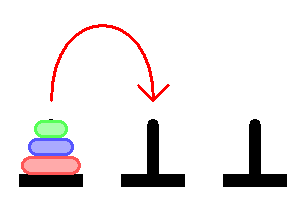

In [68]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Ханойская башня.gif")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [9]:
def recursionMaker(n, x, y):
    # n - количество дисков, которые нужно переместить на место y
    if n > 1:
        recursionMaker(n - 1, x, 6 - x - y)
    print('%i --> %i' % (x, y))
    if n - 1 > 1:
        recursionMaker(n - 1, 6 - x - y, y)
    elif n - 1 == 1:
        print('%i --> %i' % (6 - x - y, y))

In [10]:
def fixedHanoyCycleAlgorithm(n, x, y):
    disks = [0] * n # позиция каждого диска
    cntr = [0] * n # счётчик использования
    corrs = { 0 : x, 1 : y, 2 : 6 - x - y }
    for i in range(2 ** n):
        for disk in range(n):
            if 2 ** disk + 2 ** (disk + 1) * cntr[disk] == i:
                cntr[disk] += 1
                old = disks[disk]
                disks[disk] = (disks[disk] + 1 + (n - 1 - disk) % 2) % 3
                print("%i: %i --> %i" % (disk + 1, corrs[old], corrs[disks[disk]]))
                break

In [12]:
n = int(input('Введите высоту пирамидки (в дисках): '))
x = int(input('Введите номер стержня, на котором расположена пирамидка: '))
y = int(input('Введите номер стержня, на который нужно переместить пирамидку: '))

print('\nПример элемента последовательности перекладываний: ')
print('"1 --> 2". Это значит, что диск переложили с первого колышка на второй.\n')

if not (1 <= x <= 3 and 1 <= y <= 3):
    print('Программа не будет выполняться. В условии задачи сказано, что стержней всего три.')
elif n < 1 or x == y:
    print('Программе выполняться не требуется.')
else: 
    # запускаем две функции по очереди и измеряем время
    recursionMaker(n, x, y); print()
    
    print('Рекурсивный алгоритм.')
    input('Продолжить')
    
    fixedHanoyCycleAlgorithm(n, x, y); print()
    
    print('Циклический алгоритм.')
    input('Завершить')

Введите высоту пирамидки (в дисках): 4
Введите номер стержня, на котором расположена пирамидка: 1
Введите номер стержня, на который нужно переместить пирамидку: 2

Пример элемента последовательности перекладываний: 
"1 --> 2". Это значит, что диск переложили с первого колышка на второй.

1 --> 3
1 --> 2
3 --> 2
1 --> 3
2 --> 1
2 --> 3
1 --> 3
1 --> 2
3 --> 2
3 --> 1
2 --> 1
3 --> 2
1 --> 3
1 --> 2
3 --> 2

Рекурсивный алгоритм.
Продолжить
1: 1 --> 3
2: 1 --> 2
1: 3 --> 2
3: 1 --> 3
1: 2 --> 1
2: 2 --> 3
1: 1 --> 3
4: 1 --> 2
1: 3 --> 2
2: 3 --> 1
1: 2 --> 1
3: 3 --> 2
1: 1 --> 3
2: 1 --> 2
1: 3 --> 2

Циклический алгоритм.
Завершить


## Домашнее задание (дополнительное):

# Задание "Вне системы"

Написать программу, совершающую элементарные алгебраические операции ($A+B$, $A-B$, $A*B$, $A/B$) с числами в произвольной системе исчисления.

*Подсказка: обратите внимание на устройство программы `convert_base()` и рисунок с выполнением операций `+` и ` * ` ниже:*

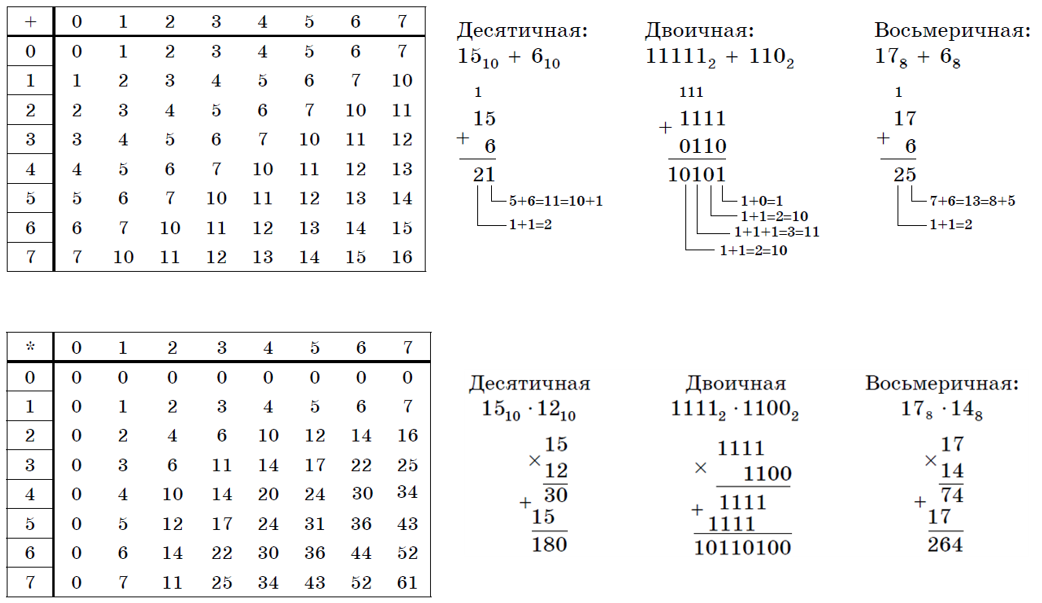

In [18]:
совершающую# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("операции.png")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [62]:
try:
    print('Выберите операцию:')
    print('1) сложение')
    print('2) умножение')
    print('3) вычитание')
    print('4) деление (только целочисленное): ', end = '')
    task = int(input())
    a, b = input('Введите два числа в произвольных ' +
                 'системах счисления через пробел: ').split()
    a_base, b_base = map(int, input('Введите системы счисления ' +
                                    'чисел через пробел: ').split())
    a_10 = int(convert_base_R(a, from_base = a_base))
    b_10 = int(convert_base_R(b, from_base = b_base))
    if b_10 == 0 and task == 4:
        raise ZeroDivisionError
    c_base = int(input('Введите систему счисления результата: '))
    if task == 1:
        print('Результат:', convert_base_R(a_10 + b_10, to_base = c_base))
    elif task == 2:
        print('Результат:', convert_base_R(a_10 * b_10, to_base = c_base))
    elif task == 3:
        print('Результат:', convert_base_R(a_10 - b_10, to_base = c_base))
    elif task == 4:
        print('Результат:', convert_base_R(a_10 // b_10, to_base = c_base))
except ValueError:
    print('Ошибка введенных данных.')
    ERRMSG()
except ZeroDivisionError:
    print('Ошибка деления на ноль.')
    ERRMSG()
except IndexError:
    print('Ошибка индекса.')
    ERRMSG()

Выберите операцию:
1) сложение
2) умножение
3) вычитание
4) деление (только целочисленное): 1
Введите два числа в произвольных системах счисления через пробел: 17ab 84cd
Введите системы счисления чисел через пробел: 16 16
Введите систему счисления результата: 16
Результат: 9C78


# Задание "Умножение Карацубы"

`n`-числа — те числа, которые требуют не более `n` элементов элементарных типов (цифр) в своём представлении. Будем считать, что с такими числами умеет работать вычислитель. Однако если необходимо перемножить числа в два раза длиннее — `2n`-числа, — как это сделать?

Можно воспользоваться наивным алгоритмом, основанном на правилах умножения и переносе разрядов. Однако такой алгоритм слишком накладен. К счастью, имеется более быстрый алгоритм. Он изобретён в 1960-х годах аспирантом А. Н. Колмогорова Анатолием Карацубой и с тех пор является неизменным участником любых библиотек работы с большими числами. Нас он интересует постольку, поскольку реализует принцип "разделяй и властвуй". 

Пусть нам требуется перемножить два `2n`-числа. Введём константу `T`, на единицу большую максимального числа, представляемого `n`-числом. Тогда любое `2n`-число `X` можно представить в виде суммы $Tx_u + x_l$.

$$N_1 = Tx_1 + y_1$$
$$N_2 = Tx_2 + y_2$$

При умножении в столбик:

$$N_1 × N_2 = T^2x_1x_2 + T(x_1y_2 + x_2y_1) + y_1y_2.$$

Это — четыре операции умножения и три операции сложения. Число `T` определяет, сколько нулей нужно добавить к концу числа в соответствующей системе счисления.

Алгоритм Карацубы находит произведение по другой формуле:

$$N_1 × N_2 = T^2x_1x_2 + T((x_1 + y_1)(x_2 + y_2) − x_1x_2 − y_1y_2) + y_1y_2.$$

Напишите программу, реализующую этот алгоритм. Представьте входные и выходные данные в формате `list`, хранящем значения `x` и `y`. 

In [1]:
def kar():
    spis = []
    x = input('Введите первое число: ')
    spis.append(x)
    y = input('Введите второе число: ')
    spis.append(y)
    if len(x) <= 10 and len(y) <= 10:
        return (int(x))*(int(y))
    else:
        a = len(x)
        if a % 2 == 0:
            mid = a / 2
            xs, ys = str(x), str(y)
            
            x_list, y_list = [i for i in xs], [i for i in ys]
            
            first_halfX, second_halfX = x_list[: a//2], x_list[a//2 :]
            first_halfY, second_halfY = y_list[: a//2], y_list[a//2 :]
            
            xq, xw = ''.join(first_halfX),''.join(second_halfX)
            x1, x2 = int(xq), int(xw)
            yq,yw = ''.join(first_halfY), ''.join(second_halfY)
            y1, y2 = int(yq), int(yw)
        elif a % 2 == 1:
            mid = (a + 1) / 2
            xs, ys = str(x), str(y)
            x_list, y_list = [i for i in xs], [i for i in ys]
            
            x_list.append(0)
            y_list.append(0)
            
            first_halfX, second_halfX = x_list[: a // 2], x_list[a // 2 :]
            first_halfY, second_halfY = y_list[: a // 2], y_list[a // 2 :]
            
            second_halfX.pop()
            second_halfY.pop()
            xq, xw = ''.join(first_halfX),''.join(second_halfX)
            x1, x2 = int(xq), int(xw)
            yq,yw = ''.join(first_halfY), ''.join(second_halfY)
            y1, y2 = int(yq), int(yw)
    mult = x2 * y2 + ((x1 + x2) * (y1 + y2) - y1 * x1 - y2 * x2) * 10 ** mid + y1 * x1 * 10 ** (2 * mid)
    spis.append(mult)
    print(spis)

In [3]:
kar()

Введите первое число 123456789987654321
Введите второе число 987654321123456789
['123456789987654321', '987654321123456789', 1.219326321033379e+35]


## Другие способы решения

In [70]:
from math import log10

def karatsuba(x,y):
    # Set B = 10
    B = 10
    
    # Recursion base case
    if x < 10 or y < 10:
        return x*y    
    
    # m set to be length of x or y, whichever is maximum
    # This can be done using logarithms with base 10 or alternatively,
    # m = max(len(str(x)), len(str(y)))
    # But such a method will be inefficient for very large n
    m = max(int(log10(x)+1), int(log10(y)+1))
    
    # check whether m is even. If odd, set m lower by 1
    if m % 2 != 0:
        m -= 1
    m_2 = int(m/2)
    
    a, b = divmod(x, B**m_2)
    c, d = divmod(y, B**m_2)
    
    ac = karatsuba(a,c)
    bd = karatsuba(b,d)
    ad_bc = karatsuba((a+b),(c+d)) - ac - bd
    
    return ((ac*(10**m)) + bd + ((ad_bc)*(10**m_2)))

Источник: [IntentionalConfusedScarab - Repl.It](https://repl.it/repls/IntentionalConfusedScarab)

In [71]:
print(karatsuba(int(input('Введите первое число: ')), 
                int(input('Введите первое число: '))))

Введите первое число: 12345678
Введите первое число: 87654321
1082152022374638


In [72]:
def karat(x,y):
    if len(str(x)) == 1 or len(str(y)) == 1:
        return x*y
    else:
        m = max(len(str(x)),len(str(y)))
        m2 = m // 2

        a = x // 10**(m2)
        b = x % 10**(m2)
        c = y // 10**(m2)
        d = y % 10**(m2)

        z0 = karat(b,d)
        z1 = karat((a+b),(c+d))
        z2 = karat(a,c)

        return (z2 * 10**(2*m2)) + ((z1 - z2 - z0) * 10**(m2)) + (z0)

Источник: [StackOverFlow](https://stackoverflow.com/questions/42324419/karatsuba-multiplication-implementation)

In [73]:
print(karat(int(input('Введите первое число: ')), 
            int(input('Введите первое число: '))))

Введите первое число: 12345678
Введите первое число: 87654321
1082152022374638
